# 3. FIFA데이터셋으로 피벗테이블 만들기

이번 차시에서는 fifa21.csv를 한 번만 더 이어서 살펴보겠습니다.
엑셀의 피벗테이블에 해당하는 group_by나 crosstab, value_counts 등의 피벗 메서드를 통해
데이터프레임을 그룹화하거나 재구성해보고, 판다스를 통한 시각화도 살짝 진행해보겠습니다.

3-1.

In [301]:
# 임포트
import pandas as pd

In [302]:
# 데이터셋 불러오기
df = pd.read_csv("../2_파이썬기초&판다스기초/fifa21.csv")

In [307]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,34,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,42+3,42+3,42+3,36+3,34+3,34+3,34+3,34+3,34+3
4,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,33,1987-01-24,182,86,Uruguay,FC Barcelona,...,67+3,68+3,68+3,68+3,67+3,64+3,63+3,63+3,63+3,64+3


In [308]:
# 나라별로 선수들의 wage 합계를 구해보려면?
country_wage = df["wage_eur"].groupby(df["nationality"])
country_wage_sum = country_wage.sum()
country_wage_sum

nationality
Afghanistan       3000
Albania         388600
Algeria        1115000
Andorra            800
Angola          153000
                ...   
Uzbekistan       22000
Venezuela       376400
Wales          1206950
Zambia           64500
Zimbabwe        144000
Name: wage_eur, Length: 162, dtype: int64

In [309]:
# 기본적으로 국적 오름차순(sort_index by nationality)으로 정렬된 Series를 리턴합니다.
# sort_values를 통해 연봉합이 높은 순서로 정렬해보려면?
country_wage_sum.sort_values(ascending=False).head()

nationality
England    15706500
Spain      15556900
France     13297450
Brazil     12941350
Germany    10620450
Name: wage_eur, dtype: int64

In [310]:
# 이 중 대한민국의 연봉합은?
country_wage_sum["Korea Republic"]

1100700

In [311]:
# 대한민국의 주급 합계는 약 백십만 유로.
# 이 정도면 랭킹 몇 위일까?
country_wage.sum().rank(ascending=False)["Korea Republic"]

37.0

In [312]:
# 우리나라가 주급합계 기준 37위네요.
# 선수가 많은 국가들이 있을 수도 있으니 평균과 표준편차를 알아보겠습니다.
country_wage.describe()[["mean", "std"]]\
    .sort_values(by="mean", ascending=False)

,mean,std
nationality,,
Tanzania,55000.0,NaN
Dominican Republic,33000.0,61335.144901
Bermuda,33000.0,NaN
Saint Kitts and Nevis,30500.0,40305.086528
Armenia,23500.0,26362.852653
...,...,...
United Arab Emirates,500.0,0.000000
Malawi,500.0,NaN
Papua New Guinea,500.0,NaN


In [318]:
# 위의 코드는 직관적이기는 하지만,
# agg를 통해 간편하게 실행할 수도 있습니다.

country_wage.agg(["mean", "std"])\
    .sort_values(by="mean", ascending=False)

,mean,std
nationality,,
Tanzania,55000.0,NaN
Dominican Republic,33000.0,61335.144901
Bermuda,33000.0,NaN
Saint Kitts and Nevis,30500.0,40305.086528
Armenia,23500.0,26362.852653
...,...,...
United Arab Emirates,500.0,0.000000
Malawi,500.0,NaN
Papua New Guinea,500.0,NaN


In [319]:
# 탄자니아, 도미니카, 버뮤다.. 대체로 생소한 국가가 주급평균이 높네요.
# (사실 스타플레이어 한 명의 몸값이 높죠. 탄자니아의 음브와나 사마타 같은..)

In [320]:
# 이번엔 영국과 이탈리아, 브라질, 대한민국의 평균주급 순위를 한 번 확인해볼까요?

country_wage.describe()[["mean"]].rank(ascending=False).loc[[
    "England", "Italy", "Brazil", "Korea Republic"]]

,mean
nationality,
England,45.0
Italy,11.0
Brazil,16.0
Korea Republic,117.0


In [321]:
# 음, 우리나라의 평균주급은 더 낮은 편이네요.
# 나라별 선수의 수가 영향이 클 것 같은데,
# 나라별 선수의 수를 집계해볼까요?
# 드디어 value_counts를 사용해볼 차례입니다.
df["nationality"].value_counts()

England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
                 ... 
New Caledonia       1
Bermuda             1
Chad                1
Tanzania            1
Nicaragua           1
Name: nationality, Length: 162, dtype: int64

<AxesSubplot:>

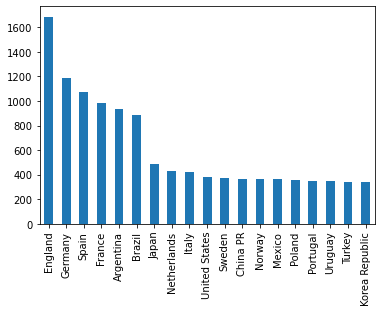

In [330]:
# 판다스의 시각화는 엄청나게 간편합니다.
df["nationality"].value_counts().head(19)\
    .plot.bar()

<AxesSubplot:>

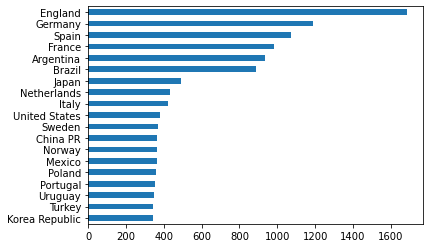

In [336]:
# 가로 막대그래프로 그려볼까요?
df["nationality"].value_counts().head(19).sort_values(ascending=True)\
    .plot.barh()

In [387]:
# 그럼 이번엔,
# 각 클럽의 국가별 선수 수를 확인해보려면?

df2 = df.groupby(["league_name", "nationality"]).count()["sofifa_id"]
df2.name = "선수 수"
df2

league_name                  nationality
Argentina Primera División   Argentina      571
                             Armenia          1
                             Chile            7
                             Colombia        20
                             Ecuador          2
                                           ... 
Venezuelan Primera División  Ghana            1
                             Mexico           1
                             Nicaragua        1
                             Uruguay          1
                             Venezuela      139
Name: 선수 수, Length: 1744, dtype: int64

In [219]:
# 리그별로 상위 3개의 국가만 보고 싶으면?
# df2.head(3)을 하면 될까요?
df2.head(3)

league_name                 nationality
Argentina Primera División  Argentina      571
                            Armenia          1
                            Chile            7
Name: 선수 수, dtype: int64

In [414]:
# 잉? 안 되네요.
# 그룹별 상위3개가 아니라 전체의 상위 3개가 나와버렸네요..
# 어떻게 해야 할까요?
# 약간 번거롭지만, 아래처럼 실행하면 됩니다.

df.groupby(by=["league_name", "nationality"])

league_name                  nationality
Argentina Primera División   Argentina      571
                             Armenia          1
                             Chile            7
                             Colombia        20
                             Ecuador          2
                                           ... 
Venezuelan Primera División  Ghana            1
                             Mexico           1
                             Nicaragua        1
                             Uruguay          1
                             Venezuela      139
Name: 선수 수, Length: 1744, dtype: int64
